In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_regression
import sys
from yaml import load
from yaml import CLoader as Loader
import xarray as xr
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

sys.path.insert(0, '/home/phyto/planktonSDM/functions/')
from tune import tune 
from functions import example_data

(array([16012.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  1067.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

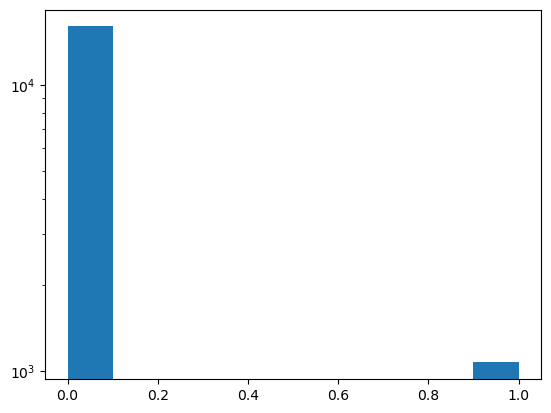

In [2]:

ds = xr.open_dataset("/home/phyto/Emma_Doherty/zoo_final_1992_2017_1x1.nc") 

x = ds['species_7'].to_dataframe()
x[x > 0] = 1

plt.hist(x, log=True)

In [3]:
# Setting up the model

with open('/home/phyto/planktonSDM/configuration/example_Emma.yml', 'r') as f:
    model_config = load(f, Loader=Loader)

ds = xr.open_dataset("/home/phyto/Emma_Doherty/zoo_final_1992_2017_1x1.nc") 
d = ds.to_dataframe()
d = d.reset_index()
d = d.dropna()
d = d.set_index(['lat', 'lon', 'time'])

species = "species_7"
X = d[["SSS", "temperature", "MLD"]]
y = d[[species]]
y.name = species


scaler = StandardScaler()  
scaler.fit(X)  
X = scaler.transform(X)


m = tune(X, y, model_config)

scale X = True
              0         1         2
7390  -0.657798 -1.228735 -0.440841
308   -1.415674  1.704102 -0.487090
7387  -1.321013 -0.808901 -0.482141
5511   0.193379 -0.042612 -0.436612
13372  0.702833 -0.310440 -0.269512
...         ...       ...       ...
7813   0.461558 -0.665423  0.141102
10955 -0.728767  0.459789 -0.337995
5192  -1.073272 -1.072787 -0.408823
12172  0.975591  1.903422 -0.417164
235    0.585418 -0.808608 -0.509243

[17079 rows x 3 columns]
upsampling = True


In [4]:
'''
1-phase Random forest classifier
'''
m.train(model="rf", classifier=True)

training classifier
Fitting 3 folds for each of 36 candidates, totalling 108 fits


[0.75585518 0.75713168 0.74028801]
clf balanced accuracy 0.75
execution time: 9.5367431640625e-07 seconds


In [5]:
from predict import predict


In [6]:
envdata = pd.DataFrame(X)
envdata['lat'] = [1] * len(envdata)
envdata.set_index(['lat'], inplace=True)
print(envdata)
m = predict(X, y, envdata, model_config)

print()
m.make_prediction()

            0         1         2
lat                              
1    1.307934 -0.022763  1.523706
1    1.326727 -0.049090  0.888747
1    1.346679 -0.095872  0.386125
1    1.180792 -0.241405  0.396102
1    1.164524 -0.294106  0.252436
..        ...       ...       ...
1    0.500137 -0.789825  2.274647
1    0.320770 -1.057966  0.182750
1    0.385177 -1.005622  0.318041
1    0.359085 -1.001118  0.284218
1    0.162924 -0.988291  0.533184

[17079 rows x 3 columns]
upsampling = True

number of models in ensemble:1
/home/phyto/CoccoML/ModelOutputEmma/rf/scoring/
/home/phyto/CoccoML/ModelOutputEmma/rf/model/
predicting classifier
predicting probabilities


finished
execution time: 0.35125160217285156 seconds


In [7]:
print(envdata)

            0         1         2
lat                              
1    1.307934 -0.022763  1.523706
1    1.326727 -0.049090  0.888747
1    1.346679 -0.095872  0.386125
1    1.180792 -0.241405  0.396102
1    1.164524 -0.294106  0.252436
..        ...       ...       ...
1    0.500137 -0.789825  2.274647
1    0.320770 -1.057966  0.182750
1    0.385177 -1.005622  0.318041
1    0.359085 -1.001118  0.284218
1    0.162924 -0.988291  0.533184

[17079 rows x 3 columns]


<xarray.Dataset>
Dimensions:    (lat: 17079)
Coordinates:
  * lat        (lat) int64 1 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1 1
Data variables:
    species_7  (lat) float64 ...


(array([11467.,  1970.,  2191.,   953.,   151.,    85.,    84.,    49.,
          111.,    18.]),
 array([0.00232019, 0.05963234, 0.11694449, 0.17425664, 0.23156879,
        0.28888094, 0.34619309, 0.40350524, 0.46081739, 0.51812954,
        0.57544169]),
 <BarContainer object of 10 artists>)

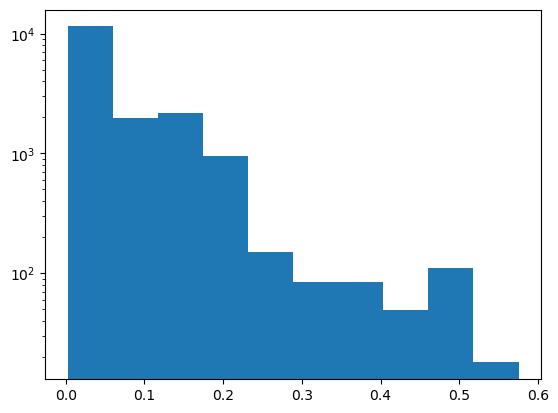

In [8]:
import matplotlib.pyplot as plt

ds = xr.open_dataset("/home/phyto/CoccoML/ModelOutputEmma/rf/predictions/species_7.nc") 
print(ds)
x = ds['species_7'].to_dataframe()


plt.hist(x, log=True)